In [ ]:
# Semana 1 – Setup del proyecto btc_price
# Objetivo: Obtener datos OHLCV de btc_price y guardarlos en formato Parquet

# Instalar librerías necesarias (solo si hace falta)
!pip install yfinance pyarrow ccxt
!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=d6c192be91efd5eef481f20a777fe47122cf9ca7380242aa13c4d399c10d52e9
  Stored in directory: /root/.cache/pip/wheels/a1/d7/29/7781cc5eb9a3659d032d7d15bdd0f49d07d2b24fec29f44bc4
Successfully built ta


In [ ]:
# Conectar con Google Drive para guardar datos
from google.colab import drive
drive.mount('/content/drive')

# Crear carpetas del proyecto en Google Drive
import os

base_dir = "/content/drive/MyDrive/btc_prediction_project"
data_dir = os.path.join(base_dir, "data")
os.makedirs(data_dir, exist_ok=True)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Descargar datos de btc_price con yfinance
import yfinance as yf
import pandas as pd
import ta

In [ ]:
btc_price = yf.download("BTC-USD", start="2010-01-01", end="2025-06-21", interval="1d")
btc_price.to_parquet(f"{data_dir}/btc_price_yfinance.parquet")

# Mostrar últimas filas como validación
btc_price.head()

/tmp/ipython-input-4-2088935551.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  btc_price = yf.download("BTC-USD", start="2010-01-01", end="2025-06-21", interval="1d")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800
2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200
2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700
2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600
2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100


In [ ]:
# Aplana las columnas uniendo los niveles del MultiIndex
btc_price.columns = [f"{col[0]}_{col[1]}" for col in btc_price.columns]

btc_price.columns

Index(['Close_BTC-USD', 'High_BTC-USD', 'Low_BTC-USD', 'Open_BTC-USD',
       'Volume_BTC-USD'],
      dtype='object')

In [ ]:
# Mostrar el tamaño (dimensión) del dataset: número de filas y columnas
print("Tamaño del dataset:")
print(f"Número de filas: {btc_price.shape[0]}")
print(f"Número de columnas: {btc_price.shape[1]}\n")

# Mostrar los nombres de todas las columnas presentes en el dataset
print("Columnas del dataset:")
print(btc_price.columns)
print()

#############################################################################3

# Comprobar si hay valores nulos en cada columna y contar cuántos son
print("Número de valores nulos por columna:")
print(btc_price.isnull().sum())
print()

# Verificamos que la columna 'None' ha sido eliminada correctamente
# Al imprimir nuevamente los nombres de las columnas, podemos asegurarnos de que la columna ha sido eliminada.
print("\nNombres de las columnas después de la eliminación:", btc_price.columns)

##################################################################################3

# Verificar si existen columnas completamente vacías (todas sus celdas nulas)
empty_cols = btc_price.columns[btc_price.isnull().all()]
if len(empty_cols) > 0:
    print("Columnas completamente vacías (todas sus celdas son nulas):")
    print(list(empty_cols))
else:
    print("No hay columnas completamente vacías.")
print()

# Mostrar el tipo de datos (dtype) de cada columna, para saber si son numéricas, de texto, etc.
print("Tipos de datos de las columnas:")
print(btc_price.dtypes)
print()

# Mostrar un resumen estadístico básico de todas las columnas numéricas
print("Resumen estadístico de las variables numéricas:")
print(btc_price.describe().transpose())
# Esta medida muestras valores atipicos, algo que veremos con mas tranquilidad
# en la parte de lso outliners

# Análisis detallado de las características numéricas
numeric_cols = btc_price.select_dtypes(include=['float64', 'int64']).columns
print("Características numéricas analizadas:", list(numeric_cols))
print()

for col in numeric_cols:
    print(f"Analizando la variable numérica: {col}")
    print(f"Media: {btc_price[col].mean():.2f}")
    print(f"Desviación estándar: {btc_price[col].std():.2f}")
    print(f"Mínimo: {btc_price[col].min()}")
    print(f"Máximo: {btc_price[col].max()}")
    print()

# Análisis detallado de las características categóricas
categorical_cols = btc_price.select_dtypes(include=['object']).columns
print("Características categóricas analizadas:", list(categorical_cols))
print()

for col in categorical_cols:
    print(f"Analizando la variable categórica: {col}")
    print(f"Número de categorías: {btc_price[col].nunique()}")
    print(f"Moda (categoría más frecuente): {btc_price[col].mode()[0]}")
    print()


Tamaño del dataset:
Número de filas: 3930
Número de columnas: 5

Columnas del dataset:
Index(['Close_BTC-USD', 'High_BTC-USD', 'Low_BTC-USD', 'Open_BTC-USD',
       'Volume_BTC-USD'],
      dtype='object')

Número de valores nulos por columna:
Close_BTC-USD     0
High_BTC-USD      0
Low_BTC-USD       0
Open_BTC-USD      0
Volume_BTC-USD    0
dtype: int64


Nombres de las columnas después de la eliminación: Index(['Close_BTC-USD', 'High_BTC-USD', 'Low_BTC-USD', 'Open_BTC-USD',
       'Volume_BTC-USD'],
      dtype='object')
No hay columnas completamente vacías.

Tipos de datos de las columnas:
Close_BTC-USD     float64
High_BTC-USD      float64
Low_BTC-USD       float64
Open_BTC-USD      float64
Volume_BTC-USD      int64
dtype: object

Resumen estadístico de las variables numéricas:
                 count          mean           std           min  \
Close_BTC-USD   3930.0  2.288818e+04  2.667452e+04  1.781030e+02   
High_BTC-USD    3930.0  2.335688e+04  2.717546e+04  2.117310e+02   
Low

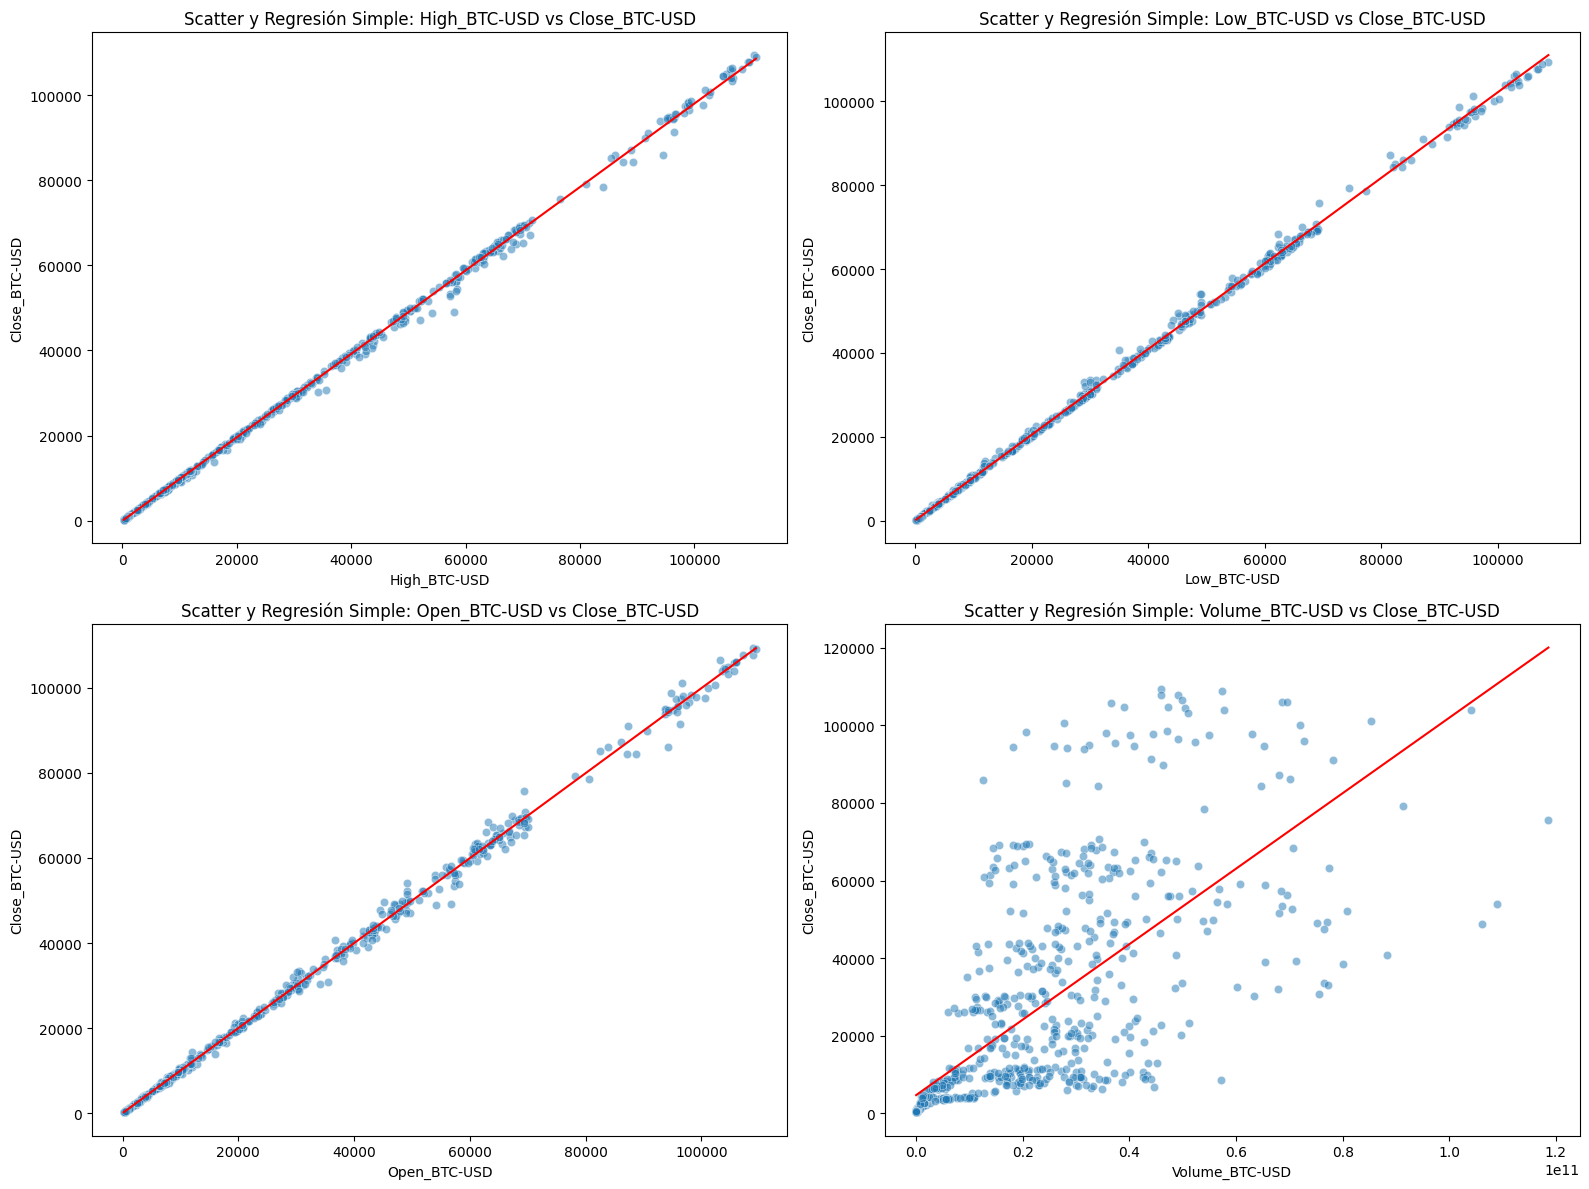

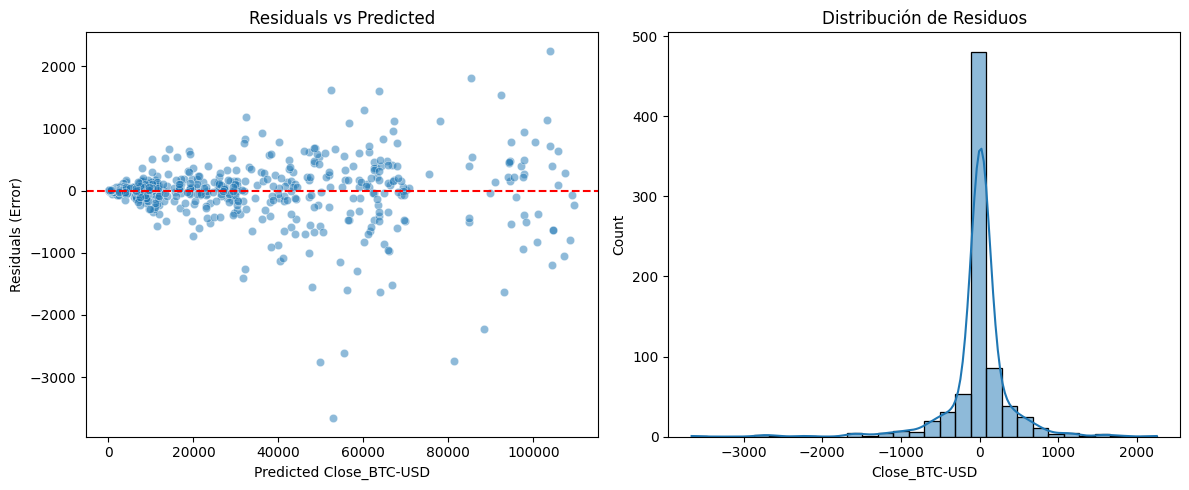

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Variables predictoras
X = btc_price[['High_BTC-USD', 'Low_BTC-USD', 'Open_BTC-USD', 'Volume_BTC-USD']]
y = btc_price['Close_BTC-USD']

# Dividir datos (entrenamiento y prueba)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones en test
y_test_pred = model.predict(X_test)

# ----------- 1. Visualización: Scatter + línea de regresión para cada predictor -----------

plt.figure(figsize=(16, 12))

predictors = X.columns
for i, col in enumerate(predictors, 1):
    plt.subplot(2, 2, i)
    # Scatter plot de variable vs objetivo (solo conjunto test para ver generalización)
    sns.scatterplot(x=X_test[col], y=y_test, alpha=0.5)

    # Para dibujar línea de regresión simple, calculamos la relación solo con esa variable
    # Nota: Como el modelo es multivariado, esta línea no representa el modelo completo, pero ayuda a visualizar tendencia.
    # Usamos numpy polyfit para línea simple:
    m, b = np.polyfit(X_test[col], y_test, 1)
    x_vals = np.linspace(X_test[col].min(), X_test[col].max(), 100)
    y_vals = m * x_vals + b
    plt.plot(x_vals, y_vals, color='red')

    plt.title(f'Scatter y Regresión Simple: {col} vs Close_BTC-USD')
    plt.xlabel(col)
    plt.ylabel('Close_BTC-USD')

plt.tight_layout()
plt.show()

# ----------- 2. Análisis residual -----------

# Residuos en test set
residuals = y_test - y_test_pred

plt.figure(figsize=(12, 5))

# Residuals vs Predicted
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test_pred, y=residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Close_BTC-USD')
plt.ylabel('Residuals (Error)')
plt.title('Residuals vs Predicted')

# Histograma de residuos para ver distribución
plt.subplot(1, 2, 2)
sns.histplot(residuals, bins=30, kde=True)
plt.title('Distribución de Residuos')

plt.tight_layout()
plt.show()

Los gráficos presentados muestran regresiones lineales simples entre las variables High, Low, Open y Volume frente al precio de cierre (Close) de Bitcoin. Se observa una relación casi perfectamente lineal en los tres primeros casos, mientras que en el caso del volumen la dispersión es considerablemente mayor.

Justificación de la forma de los gráficos
La alta correlación observada entre Close y las variables High, Low y Open se debe a que todas estas pertenecen al mismo día de cotización. El precio de cierre tiende a situarse dentro del rango diario delimitado por el máximo (High) y el mínimo (Low), lo que explica la relación casi lineal. Por su parte, el volumen (Volume) no guarda una relación tan directa con el precio de cierre, lo cual se refleja en la mayor dispersión.

Presencia de fuga de datos
Existe fuga de datos en este enfoque porque se están utilizando variables del mismo día (Open, High, Low, Volume) para predecir el precio de cierre de ese mismo día. En la práctica, estos valores no están disponibles en el momento en que se desearía hacer la predicción, lo que implica que el modelo estaría utilizando información futura o contemporánea que no estaría disponible en un escenario real de predicción.

Enfoque correcto para evitar la fuga
Redefinición del objetivo: La predicción debe centrarse en el precio de cierre del día siguiente (Close[t+1]) y no en el del mismo día (Close[t]).

Restricción de variables predictoras: Solo deben utilizarse variables disponibles hasta el día actual o anteriores, como el precio de cierre (Close[t], Close[t-1], etc.) y variables derivadas calculadas con datos pasados (por ejemplo, medias móviles, RSI, MACD).

Desplazamiento de la variable objetivo: Es necesario crear una nueva columna objetivo con el precio de cierre del día siguiente (target = Close.shift(-1)), de modo que el modelo aprenda a realizar predicciones con base únicamente en datos anteriores al objetivo.

Este ajuste permite simular de manera adecuada un entorno de predicción realista y evita que el modelo se beneficie de información que no estaría disponible al momento de realizar la predicción.

In [ ]:
# Crear la variable objetivo: el precio de cierre del día siguiente
btc_price["Target_Close"] = btc_price["Close_BTC-USD"].shift(-1)

# Calcular indicadores técnicos basados en el pasado (sin fuga de datos)
btc_price["SMA_7"] = btc_price["Close_BTC-USD"].rolling(window=7).mean()
btc_price["EMA_14"] = btc_price["Close_BTC-USD"].ewm(span=14, adjust=False).mean()
btc_price["Return_1d"] = btc_price["Close_BTC-USD"].pct_change()

# Eliminar filas con valores nulos (generados por rolling, shift, etc.)
btc_price = btc_price.dropna()

Estas serian las metricas esenciales pero se podria enriquecer con mas metricas como el rsi
Macd bollingery el momentum

In [ ]:
btc_price["RSI_14"] = ta.momentum.RSIIndicator(close=btc_price["Close_BTC-USD"], window=14).rsi()

# MACD
macd = ta.trend.MACD(close=btc_price["Close_BTC-USD"])
btc_price["MACD"] = macd.macd()
btc_price["MACD_Signal"] = macd.macd_signal()

# Bollinger Bands
bollinger = ta.volatility.BollingerBands(close=btc_price["Close_BTC-USD"])
btc_price["BB_High"] = bollinger.bollinger_hband()
btc_price["BB_Low"] = bollinger.bollinger_lband()

# Momentum (10 días)
btc_price["Momentum_10"] = btc_price["Close_BTC-USD"] - btc_price["Close_BTC-USD"].shift(10)
btc_price = btc_price.dropna()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
import numpy as np

features = [
    "SMA_7", "EMA_14", "Return_1d",
    "RSI_14", "MACD", "MACD_Signal",
     "Momentum_10"
]

X = btc_price[features]
y = btc_price["Target_Close"]

print(X.columns)
print(y)



# División aleatoria con train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=False
)

# Modelo 1: Regresión Lineal
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Modelo 2: XGBoost
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluación
print("Regresión Lineal:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R2:", r2_score(y_test, y_pred_lr))


print("\nXGBoost:")
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("R2:", r2_score(y_test, y_pred_xgb))

Index(['SMA_7', 'EMA_14', 'Return_1d', 'RSI_14', 'MACD', 'MACD_Signal',
       'Momentum_10'],
      dtype='object')
Date
2014-12-04       376.854004
2014-12-05       374.785004
2014-12-06       375.095001
2014-12-07       361.908997
2014-12-08       352.218994
                  ...      
2025-06-14    105552.023438
2025-06-15    106796.757812
2025-06-16    104601.117188
2025-06-17    104883.328125
2025-06-18    104684.289062
Name: Target_Close, Length: 3850, dtype: float64
Regresión Lineal:
MAE: 1210.3751624909457
RMSE: 1801.8239211957812
R2: 0.9951695130944908

XGBoost:
MAE: 11595.946839488637
RMSE: 19050.098062953515
R2: 0.46004117493485586
